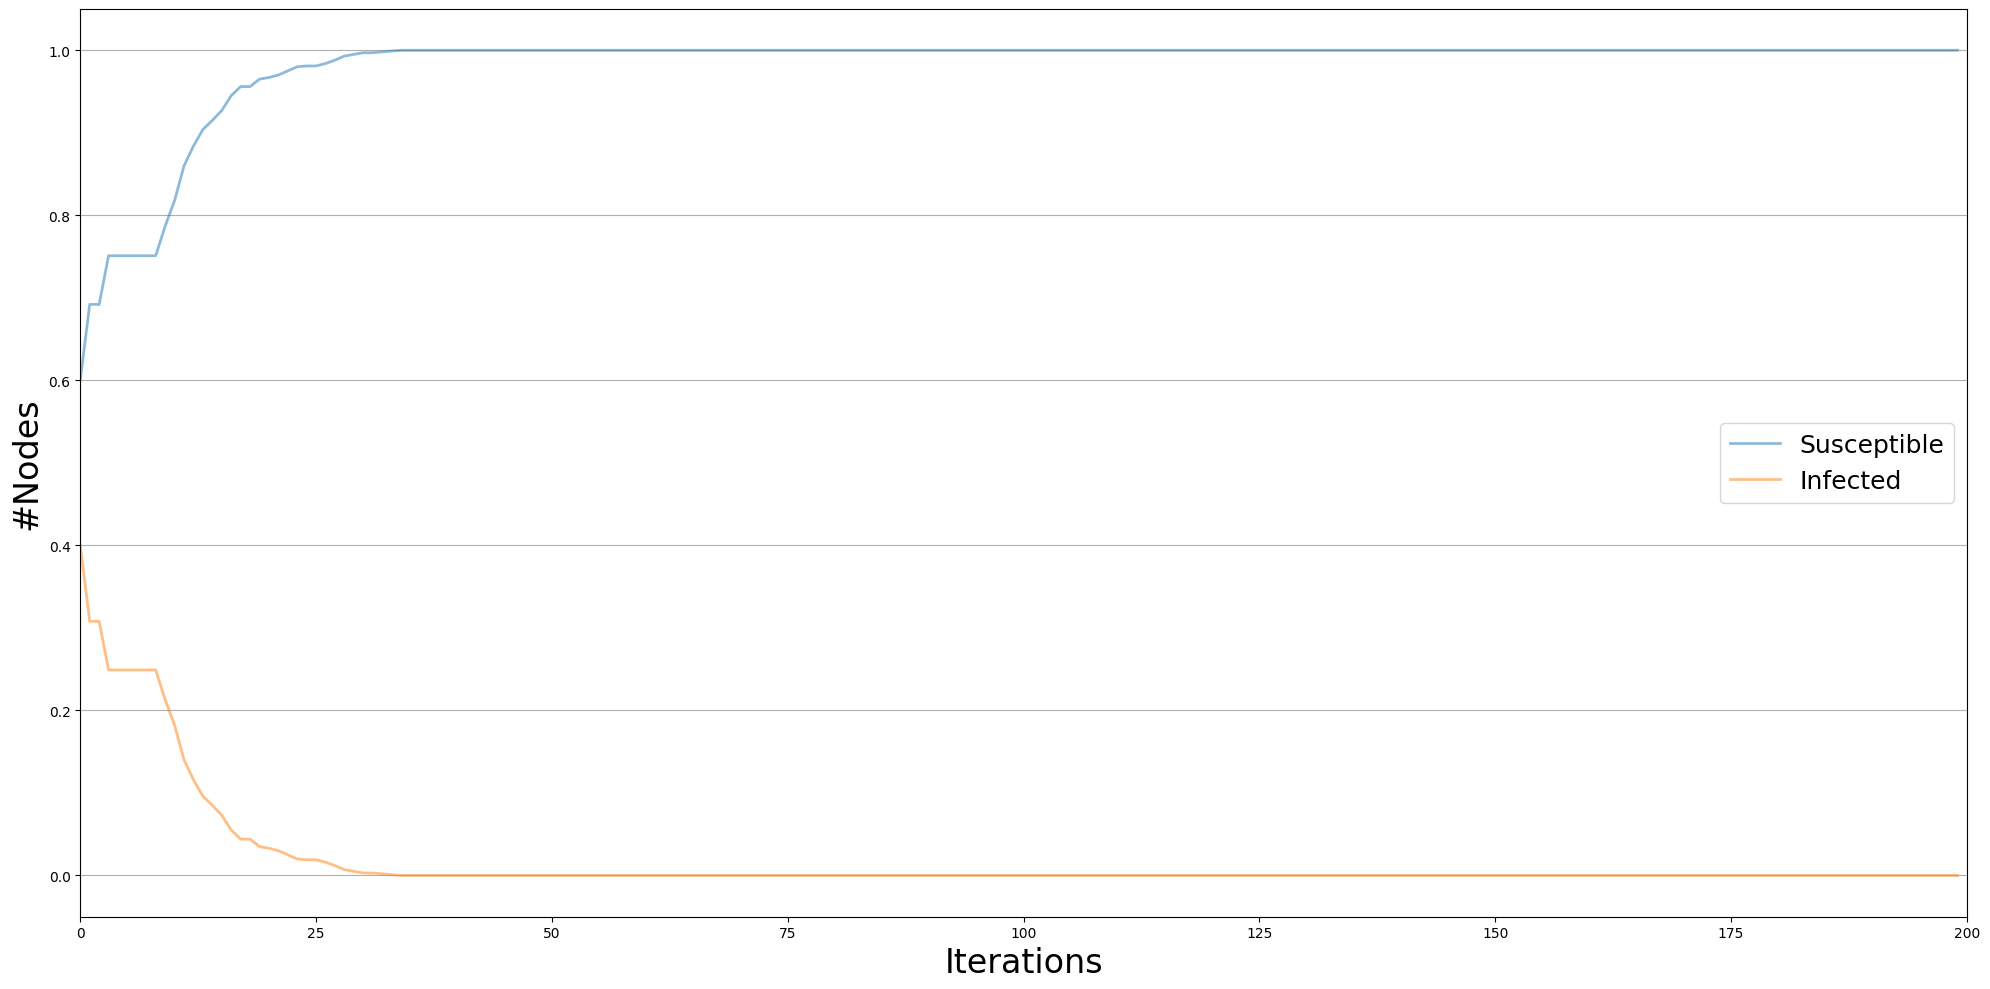

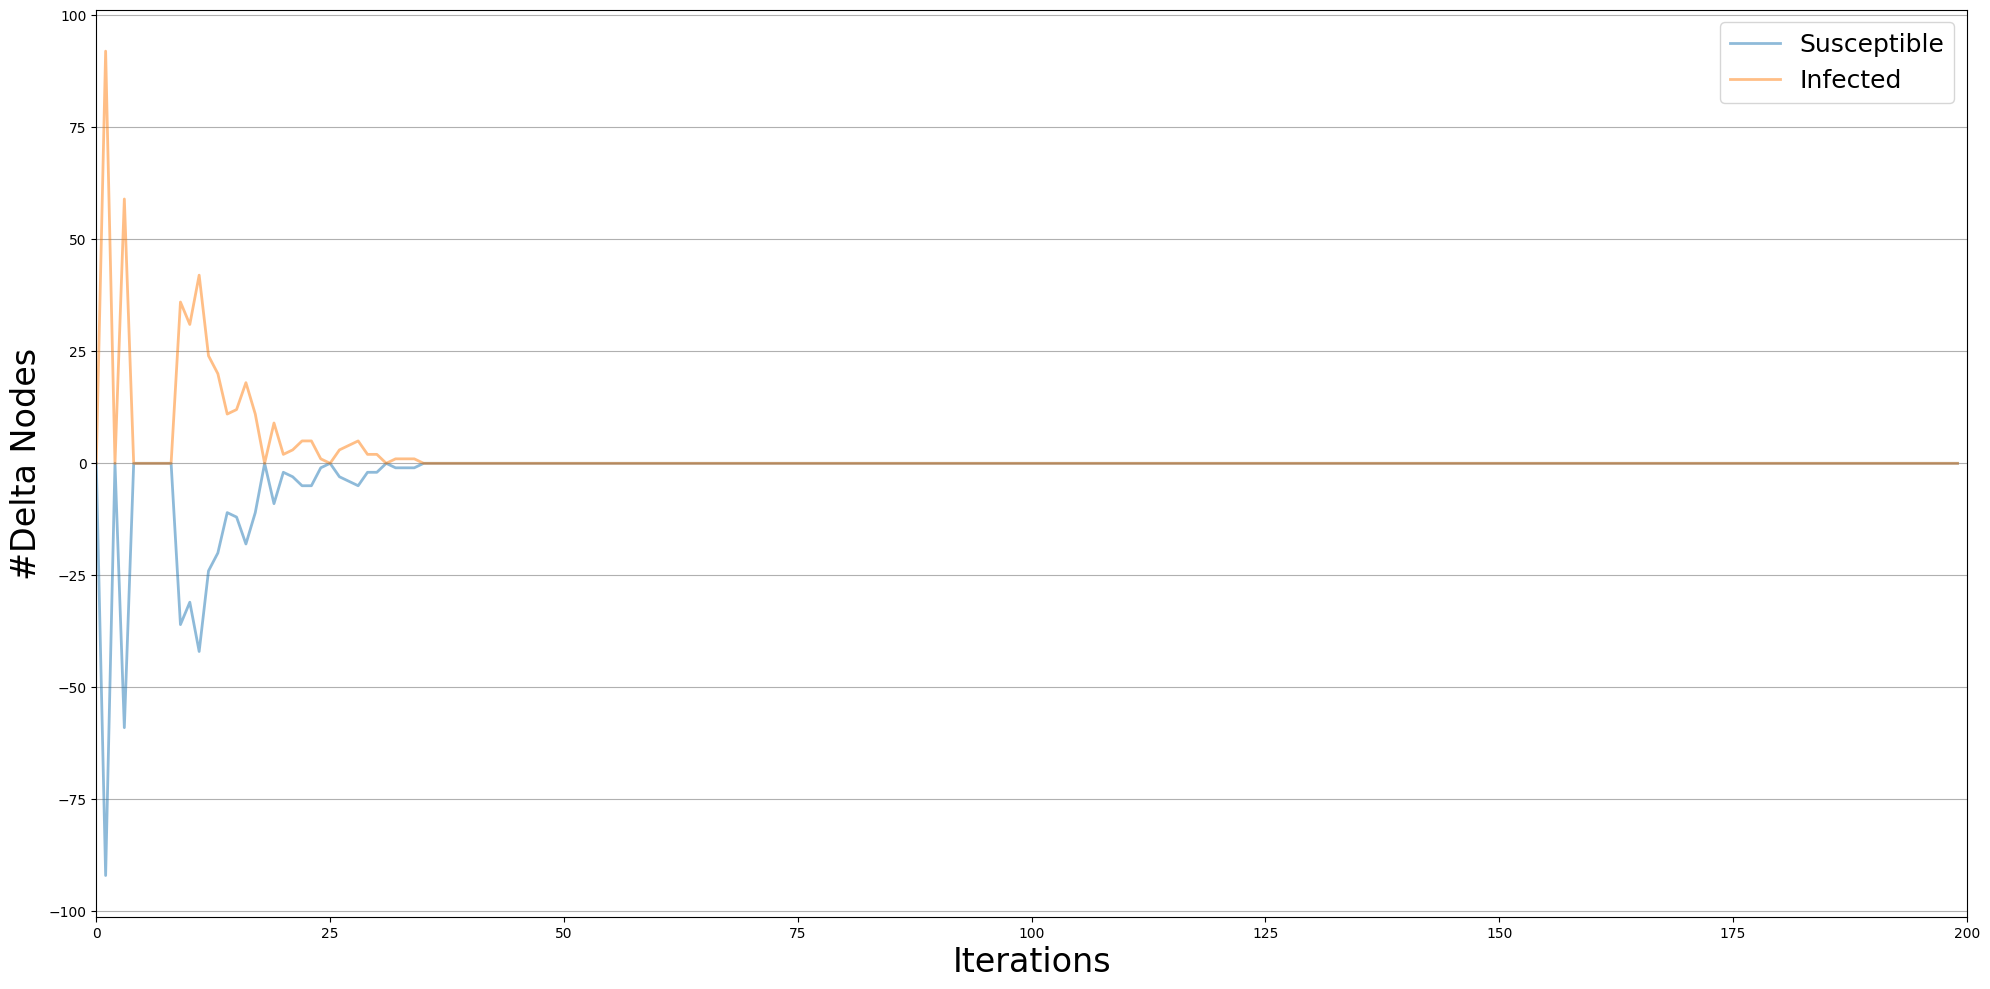

In [2]:
'''
The Sznajd model [1] is a variant of spin model employing the theory of social impact, which takes into account the fact that a group of individuals with the same opinion can influence their neighbours more than one single individual.

In the original model the social network is a 2-dimensional lattice, however we also implemented the variant on any complex networks.

Each agent has an opinion σi = ±1. At each time step, a pair of neighbouring agents is selected and, if their opinion coincides, all their neighbours take that opinion.

The model has been shown to converge to one of the two agreeing stationary states, depending on the initial density of up-spins (transition at 50% density).

'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = op.SznajdModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.4)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.p